<a href="https://colab.research.google.com/github/Tiamawa/hello-world/blob/master/Projet_ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prédiction de l'infarctus**

Sur ce notebook, nous allons nous atteler à la pise en place d'un modèle de prédiction du risque d'infarctus chez des patients par utilisation d'algorithmes de Machine Learning. Nous sommes en présence d'une `problématique de classification binaire` car l'état de sortie ne peut prendre que deux valeurs fixes: infarctus ou pas d'infarctus.

### Sommaire
- Présentation du dataset
- Visualisation des données
- Analyse exploratoire des données
- Classification à l'aide d'une régression logistique
- Classification à l'aide des forêts aléatoires
- Conclusion

# **Présentation du dataset**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score , cross_validate , StratifiedKFold,KFold
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score, balanced_accuracy_score,mean_squared_error, mean_absolute_error, r2_score

In [59]:
# On importe le jeu de données et on affiche le nombre de lignes et de colonnes. 
# La colonne id permettant d'identifier uniquemennt la personne sera mis en index 

strokes = pd.read_csv('strokes.csv', index_col = "id")

print('Le DataFrame possède', strokes.shape[0], 'lignes et', strokes.shape[1], 'colonnes.')


Le DataFrame possède 5110 lignes et 11 colonnes.


In [7]:
# Visualisation des premières lignes
strokes.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Description des colonnes
strokes.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Le tableau ci-dessus, nous permet de visualiser pour chaque colonne de type numérique:
- Le nombre de valeurs non nulles (count)
- La moyenne des valeurs sur cette colonne (mean). C'est un indicateur de position.
- La déviation standard (std). Cette valeur représente le carré de la variance et informe sur la dispersion des données autour de la valeur moyenne. C'est un indicateur de dispersion.
- La valeur miimale(min)
- le premier quartile (25%) représente la valeur de la série qui sépare les 25% inférieurs des données
- le deuxième quantile correspond à la médiane et représente la valeur de la colonneà partir de laquelle on retrouve 50% des valeurs inférieures
- le troisième quartile (75%) correspond à la valeur à partir de laquelle on retrouve 75% des valeurs inférieures

`Conclusion:` Il ressort que l'on a :
- des valeurs non renseignées sur la variable bmi(indice de masse corporelle) dont le total count (4909) est inférieur au nombre total de lignes du dataset.
- la valeur cible est rensignée pour toutes les lignes
- les valeurs de la médiane et de la moyenne pour les variables age, avg_glucose_level et bmi ne sont pas éloignés. Les données semblent homogènes
- Les valeurs des quantiles permettent de confirmer notre analyse précédente. Il n'y a pas de ruptures signnificatifs etre les second et troisième quantiles. La moyenne n'est pas non plus éloignée du dernier quantile. Les valeurs sont homogènes.

##### Typologie des colonnes

In [60]:
# Colonnes detype object
strokes.select_dtypes(include="O")

,gender,ever_married,work_type,Residence_type,smoking_status
id,,,,,
9046,Male,Yes,Private,Urban,formerly smoked
51676,Female,Yes,Self-employed,Rural,never smoked
31112,Male,Yes,Private,Rural,never smoked
60182,Female,Yes,Private,Urban,smokes
1665,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
18234,Female,Yes,Private,Urban,never smoked
44873,Female,Yes,Self-employed,Urban,never smoked
19723,Female,Yes,Self-employed,Rural,never smoked


In [61]:
# Colonnes detype numériques

strokes.select_dtypes(include="number")

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,,,,,,
9046,67.0,0,1,228.69,36.6,1
51676,61.0,0,0,202.21,NaN,1
31112,80.0,0,1,105.92,32.5,1
60182,49.0,0,0,171.23,34.4,1
1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
18234,80.0,1,0,83.75,NaN,0
44873,81.0,0,0,125.20,40.0,0
19723,35.0,0,0,82.99,30.6,0


`Remarques`: Les colonnes hypertension, heart_disease ont des valeurs booléenes mais sont des données catégorielles et non continues. Nous allons changer leur type. 

In [9]:
# Changement des types
strokes["hypertension"] = strokes["hypertension"].astype("O")
strokes["heart_disease"] = strokes["heart_disease"].astype("O")

##### Exploration

In [ ]:
#on fait un premier netoyage des donnés 

print("Nombre de lignes en double sur le jeu de données : ",  strokes.duplicated().sum()) 

print("\n")

print("Affichage des modalités de chacune des variables : \n")
for column in strokes.columns:
     print("\n" + column)
    # print(strokes[column].value_counts())
     print(strokes[column].unique())

Nombre de lignes en double sur le jeu de données :  0


Affichage des modalités de chacune des variables : 


gender
['Male' 'Female' 'Other']

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.5

In [ ]:
# Verifier si on a des colonnes avec des valeurs manquanes 

strokes.isna().any(axis = 0)


gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

`Remarques`: la colonne bmi(indice de masse corporelle) contient des valeurs manquantes.

# **Visualisation des données**

#### Visualisation de la distribution des valeurs des colonnes

No handles with labels found to put in legend.


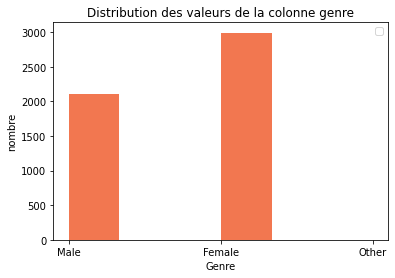

In [ ]:
plt.hist([strokes.gender], bins = 6,   color = ['#f27750']) ;
#plt.hist([strokes.stroke], bins = 6) ;
plt.ylabel('nombre')
plt.xlabel('Genre')
plt.title("Distribution des valeurs de la colonne genre")
plt.legend();



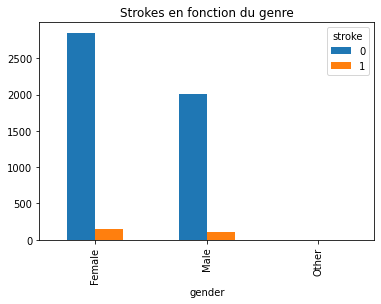

In [ ]:
#plt.bar(strokes.gender, strokes.stroke,  label = "Produit1")

strokes.groupby(['gender','stroke']).size().unstack().plot(kind='bar',stacked=False, title = "Strokes en fonction du genre")
plt.show()

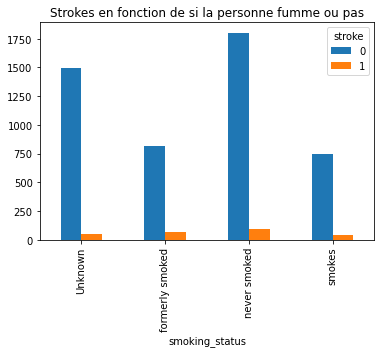

In [ ]:
strokes.groupby(['smoking_status','stroke']).size().unstack().plot(kind='bar',stacked=False, title = "Strokes en fonction de si la personne fumme ou pas")
plt.show()

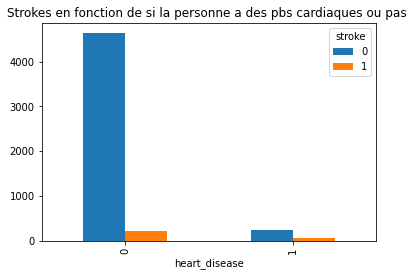

In [ ]:
strokes.groupby(['heart_disease','stroke']).size().unstack().plot(kind='bar',stacked=False, title = "Strokes en fonction de si la personne a des pbs cardiaques ou pas ")
plt.show()

Text(0.5, 1.0, 'Hypertension')

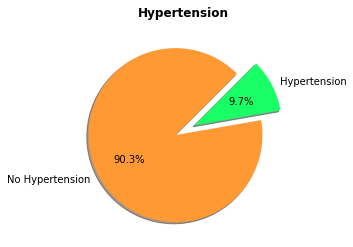

In [ ]:

labels = ["No Hypertension", "Hypertension"]
values = strokes['hypertension'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
plt.title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

Text(0.5, 1.0, 'Work Type')

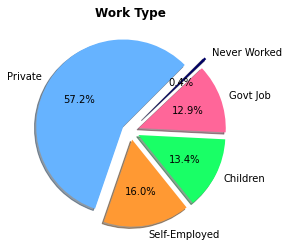

In [ ]:
labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = strokes['work_type'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
plt.title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

#### Clustering des données

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


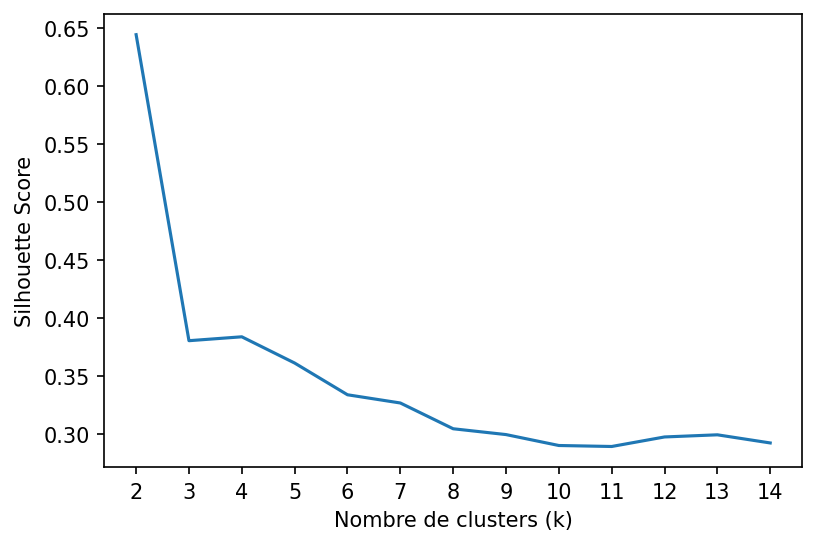

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = RobustScaler()

strokes_df = strokes.join(pd.get_dummies(strokes['gender'], prefix='gender'))
strokes_df = strokes.join(pd.get_dummies(strokes['smoking_status'], prefix='smoking_status'))
strokes_df = strokes.join(pd.get_dummies(strokes['work_type'], prefix='work_type'))
strokes_df = strokes.join(pd.get_dummies(strokes['heart_disease'], prefix='heart_disease'))
strokes_df = strokes.join(pd.get_dummies(strokes['hypertension'], prefix='hypertension'))
strokes_df = strokes.join(pd.get_dummies(strokes['Residence_type'], prefix='Residence_type'))
strokes_df = strokes.join(pd.get_dummies(strokes['ever_married'], prefix='ever_married'))

columns_to_drop = ['ever_married','Residence_type', 'hypertension','heart_disease','work_type','smoking_status', 'gender', 'stroke']
data = strokes_df.drop(columns_to_drop,axis=1).fillna(strokes_df.mean())
labels = strokes['stroke']
K = np.arange(2,15).tolist()

liste=[]
for k in K:
    k_means=KMeans(n_clusters=k, random_state=42)
    k_means.fit(data)
    liste.append(silhouette_score(data,k_means.labels_))

# On affiche le graphique

plt.figure(dpi=150)
plt.plot(K, liste)
plt.xticks(np.arange(min(np.arange(2,15)), max(np.arange(2,15))+1, 1.0))

# On définit le nom des axes

plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.show();

`Remarques`: d'après le graphique, le nomnbre de clusters optimal est 2 car c'est le nombre qui maximise le silhouette score.

In [ ]:
print(data.shape)
print(labels.shape)

(5110, 5)
(5110,)


In [13]:
# Nous choisissons deux clusters

data_2 = data.copy()

kmeans_2 = KMeans(n_clusters=2, random_state=42)

kmeans_2.fit_predict(scaler.fit(data_2).transform(data_2) )

data_2['cluster']=pd.Series(kmeans_2.labels_,  index=data_2.index)


In [14]:
# Vérification de l'homogéneité des clusters

data_2=pd.DataFrame(data_2['cluster'])
data_2['stroke']=pd.Series(labels)


print("Choix de 2 clusters : \n")
for i in range(0,2):
    print("Cluster",i,": \n", data_2.loc[data_2['cluster']==i]['stroke'].value_counts(),"\n")
    

Choix de 2 clusters : 

Cluster 0 : 
 0    3137
1     221
Name: stroke, dtype: int64 

Cluster 1 : 
 0    1724
1      28
Name: stroke, dtype: int64 



`Remarques`: les clusters ne sont pas homogènes. Le premier cluster contient la majorité des points pour les deux classes. Mais le second cluster contient un nombre non négligeable de points. 

# **Analyse exploratoire du jeu de données**

#### Relations entre variables  quantitatives

La matrice de corrélation nous permet de mesurer les niveaux de corrélation entre les variables quantitatives du jeu de données.

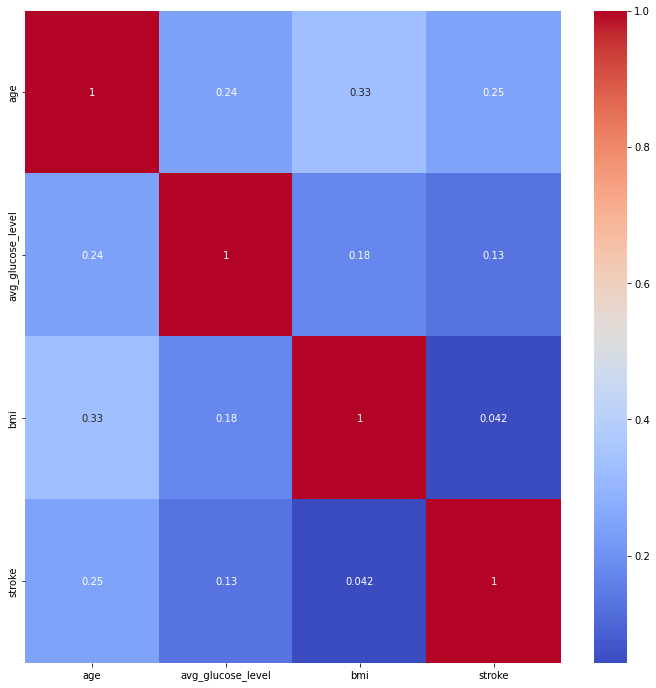

In [15]:
import seaborn as sns
from scipy.stats import pearsonr

cor = strokes.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

In [ ]:
strokes1 = strokes.fillna(strokes.median()) # la méthode pearsonr ne supporte pas les NA. Et nous en avons sur la colonne bmi

# Relation entre les variables age et taux moyen de glucose
pd.DataFrame(pearsonr(strokes1['age'], strokes1['avg_glucose_level']), index=['pearson_coeff','p-value'], columns=['test'])


,test
pearson_coeff,2.358382e-01
p-value,5.075105e-63


In [ ]:
# Relation entre les variables l'indice de masse corporelle et age
pd.DataFrame(pearsonr(strokes1['bmi'].dropna(), strokes1['age']), index=['pearson_coeff','p-value'], columns=['test'])

,test
pearson_coeff,3.333980e-01
p-value,9.515845e-128


In [ ]:
# Relation entre les variables taux moyen de glucose et l'indice de masse corporelle
pd.DataFrame(pearsonr(strokes1['avg_glucose_level'], strokes1['bmi']), index=['pearson_coeff','p-value'], columns=['test'])

,test
pearson_coeff,1.755022e-01
p-value,2.976203e-35


`Remarques`: 
- Les relations entre ces trois différentes variables ne sont pas négligeables(p-value < 0.05) mais le score < 0.5 semblent montrer que ces relations ne sont pas très importantes.  

#### Relations entre variables  qualitatives

Pour étudier les relations entre  les variables qualitatives, nous utilisons une `table de contingence`, un `test du chi2` et le `V de Cramer`. La table de contingence nous permet de comparer les proportions des valeurs prises par deux ou plusieurs variables catégorielles. Le test du Khi2 permet d'avoir les éléments de relation entre deux variables qualitatives. Le V de Cramer nous permet d'avoir un score de la relation entre deux variables catégorielles à l'image de score de Pearson pour les variables quantitatives. Nous étudions précisément les relations entre les variables qualitatives et la variable cible.

In [ ]:
# Ici, ous construisons le jeu de données composé uniquement des variables catégorielles. Les transformatios ot été effectuées momentanément pour les besoins de cet analyse
# Nous transformons les valeurs  sur les variables qualitatives
strokes2 = strokes.copy()

strokes2['hypertension'] = strokes2['hypertension'].replace([1,0], ['True','False'])
strokes2['heart_disease'] = strokes2['heart_disease'].replace([1,0], ['True','False'])
strokes2['stroke'] = strokes2['stroke'].replace([1,0], ['True','False'])

categorical = strokes2.select_dtypes(include='O')

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def V_Cramer(contingence_table, n_observations):
    """
      Nous définissons le V de Cramer ci-dessous; Elle permet d'avoir le score
    """
    khi2 = chi2_contingency(contingence_table)[0] # on récupère la statistique de test (première valeur)
    k = contingence_table.shape[0]
    r = contingence_table.shape[1]
    phi2 = max(0, khi2/n_observations - ( ((k-1)*(r-1)) / (n_observations-1) ) )
    
    ktilde = k - (k-1)**2/(n_observations - 1)
    rtilde = r - (r-1)**2/(n_observations - 1)
    
    mintilde = min(ktilde - 1, rtilde - 1)
    
    V = np.sqrt(phi2/mintilde)
    
    return V

def analyzeColumn(feature):
    """
    Cette fonction est utilisée pour analyser les features
    Elle prend en argument le nom du feaure à analyser et retourne 
    les scores Cramer, la statistique de testet le p-value.
    
    """
    table = pd.crosstab(categorical[feature], categorical['stroke'])
    corr_chi2 = chi2_contingency(table)

    d = pd.DataFrame(corr_chi2, index=['statistic','p-value', 'liberty_degre','frequencies'], 
                    columns=['result'])
    print("Details test ", "\n" )

    print( d.head(6))

    v_feature = V_Cramer(table, categorical.shape[0]) 
    print("V de cramer : ", v_feature, "\n" )

In [ ]:
# Etude genre et infarctus

analyzeColumn('gender')

Details test  

                                                          result
statistic                                               0.472587
p-value                                                 0.789549
liberty_degre                                                  2
frequencies    [[2848.108414872798, 145.89158512720155], [201...
V de cramer :  0.0 



`Remarques`: le V de cramer est nul et le p-value du test est > 0.05, il semble ne pas y avoir de relation entre le genre et le fait que l'individu ait subi un infarctus

In [ ]:
# Etude hypertension et infarctus

analyzeColumn('hypertension')


Details test  

                                                          result
statistic                                              81.605368
p-value                                                      0.0
liberty_degre                                                  1
frequencies    [[4387.266536203522, 224.7334637964775], [473....
V de cramer :  0.1256069045133085 



`Remarques`: le V de cramer est non nul et le p-value du test est < 0.05, il semble qu'il y ait une relation non négligeable entre la présence ou non de l'hypertension  et le fait que l'individu ait subi un infarctus

In [ ]:
# Etude heart_disease et infarctus

analyzeColumn('heart_disease')

Details test  

                                                          result
statistic                                              90.259561
p-value                                                      0.0
liberty_degre                                                  1
frequencies    [[4598.4489236790605, 235.55107632093933], [26...
V de cramer :  0.1321779325804356 



 `Remarques`: le V de cramer est non nul et le p-value du test est < 0.05, il semble qu'il y ait une relation non négligeable entre la présence ou non de maladie cardiaque  et le fait que l'individu ait subi un infarctus

In [ ]:
# Etude ever_married et infarctus

analyzeColumn('ever_married')

Details test  

                                                          result
statistic                                               58.92389
p-value                                                      0.0
liberty_degre                                                  1
frequencies    [[1671.3849315068494, 85.61506849315069], [318...
V de cramer :  0.10647807334277677 



`Remarques`: le V de cramer est non nul et le p-value du test est < 0.05, il semble qu'il y ait une relation non négligeable entre le fait que la personne ait été une fois marrié  et le fait que l'individu ait subi un infarctus

In [ ]:
# Etude Residence_type et infarctus

analyzeColumn('Residence_type')

Details test  

                                                          result
statistic                                               1.081637
p-value                                                 0.298332
liberty_degre                                                  1
frequencies    [[2391.4978473581214, 122.50215264187867], [24...
V de cramer :  0.003992580152454577 



`Remarques`: le V de cramer est très faible et le p-value du test est > 0.05, il semble qu'il n'y ait pas une relation entre le type de résidence et le fait que l'individu ait subi un infarctus

In [ ]:
# Etude smoking_status et infarctus

analyzeColumn('smoking_status')

Details test  

                                                          result
statistic                                              29.147269
p-value                                                 0.000002
liberty_degre                                                  3
frequencies    [[1468.7639921722114, 75.23600782778865], [841...
V de cramer :  0.07153858559970024 



`Remarques`: le V de cramer est faible et le p-value du test est < 0.05, il semble qu'il y ai une relation non négligeable entre le fait que l'individu fume et le fait qu'il ait subi un infarctus

#  **Preprocessing et création du modèle en utilisant une régression logistique** 

---





Dans cette partie, nous faisons le pré-traitement des données du fait que les modèles de Machine Learning ne prennent en compte que des valeurs numériques puis nous entraînons un modèle de classification en utilisant une régression logistique.
Dans le pré-processing, nous allons :
*   Transformer les variables catégorielles en numériques en utilisant le OneHotEncoding
*   Gérer les NaN sur les colonnes quantitatives en utilisant la médiane
*   Scaler l'ensemble des features

Dans la partie création du modèle, nous allons:

* dans un premier temps instancier un modèle de regréssion logistique avec les paramètres par défaut (maxtIter=100)
* dans un second temps, utiliser la validation croisée avec différentes valeurs de paramètres pour avoir les paramètres optimaux du modèle

Nous utilisons les pipelines. Un pipeline nous permet d'enchaîner les transformations (préprocessing des variables) et l'algorithme. Il permet égaement de tester plusieurs paramètres par cross-validation.

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score


#Ici, nous récupérons le jeu de données des features
X = strokes.drop(['stroke'], axis=1)

# Ici, nous récupérons le jeu de données correspondant à la variable cible
y = strokes['stroke']


In [34]:
# Création des tâches de préprocessing

categorical_columns=['ever_married','Residence_type', 'hypertension','heart_disease','work_type','smoking_status', 'gender']

# Transformer pour les colonnes numériques
numerical_columns= ['age', 'bmi', 'avg_glucose_level']

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())]
)

# Pré-traitement: onehotencoding pour les variables catégorielles et imputation par médiane et scaling pour les colonnes numériques
preprocessor = ColumnTransformer(transformers = [
    ('categories', OneHotEncoder(handle_unknown="ignore"), categorical_columns), 
                                      ('numerics', numeric_transformer, numerical_columns)])

In [35]:
# Classifieur de régression logistique

classifier = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(solver="newton-cg"))]

)

In [36]:
# Séparation des jeux de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [37]:
classifier.fit(X_train, y_train)
print("Model score: %.3f" % classifier.score(X_test, y_test))

Model score: 0.939


`Conclusion`: le score du modèle avec utilisant du train_test_split est égal à `0.939`

In [38]:
# Autres mesures de performance

y_pred = classifier.predict(X_test)

bac = balanced_accuracy_score(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", ac)
print("Balanced accuracy: ", bac)
print("F1 score: ", f1)


Accuracy:  0.9393346379647749
Balanced accuracy:  0.5
F1 score:  0.0


`Conclusion`: les valeurs de l'accuracy et du balanced accuracy sont très éloignés. Il semble y avoir un déséquilibre des classes.

`Proportion de la distribution des classes`

In [ ]:
from collections import Counter
from numpy import where

classes = y
features = X

# Distribution des classes
counter = Counter(classes)

print(counter)

Counter({0: 4861, 1: 249})


#### Déséquilibre des classes
Du fait qu'il y ait un déséquilibre des classes dans notre dataset, nous rajoutons le paramètre `class_weight='balanced'` à la régression logistique  pour permettre à l'algorithme de prendre en compte le déséquilibre.

Ici, nous utilisons la valisation croisée pour déterminer les paramètres optimaux : paramètre de régularisation de la régression logistique et méthode d'imputation des NaN etc.

In [39]:
# Redéfinition du classifieur:
classifier = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced', solver="newton-cg"))]

)

# Création de la grille de paramètres
param_grid = {
    "preprocessor__numerics__imputer__strategy": ["mean", "median"],
    "classifier__C": [0.1, 1.0, 5.0, 8.0, 10, 100],
    "classifier__max_iter": [100, 150, 250, 500, 10000],
    "classifier__tol": [0.1, 0.2, 0.5, 1.0]
}

In [40]:
# Instanciation de la grille de recherche des paramètres optimaux
grid_search = GridSearchCV(classifier, param_grid, cv=10)

In [41]:
#  Affichage des paramètres optimaux

grid_search.fit(X_train, y_train)
print("Paramètres optimaux:  ",  grid_search.best_params_)

Paramètres optimaux:   {'classifier__C': 5.0, 'classifier__max_iter': 100, 'classifier__tol': 0.5, 'preprocessor__numerics__imputer__strategy': 'median'}


`Conclusion`: les paramètres optimaux pour le modèle sont :
-  pour l'imputation des valeurs manquantes: la médiane
-  pour la régularisation de la régression logistique: 5.0
- le nombre maximum d'itérations pour convergence : 100

##### Construction du modèle final

In [42]:
# Transformeur final des variables numériques
numeric_transformer_final = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())]
)

preprocessor_final = ColumnTransformer(transformers = [
    ('categories', OneHotEncoder(handle_unknown="ignore"), categorical_columns),
                                      ('numerics', numeric_transformer_final, numerical_columns)])

classifier_final = Pipeline(
    steps=[("preprocessor", preprocessor_final), ("classifier", LogisticRegression(solver="newton-cg", C=5.0, max_iter=100, tol=0.5, class_weight='balanced'))]
    
)

classifier_final.fit(X_train, y_train)
print("Model score: %.3f" % classifier_final.score(X_test, y_test))



Model score: 0.750


Prédiction et mesure de performances

In [43]:
y_pred = classifier_final.predict(X_test)

In [44]:
# Calcul des autres indicateurs 
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.7495107632093934
Balanced accuracy:  0.7685987903225806
ROC AUC:  0.7685987903225805


`Conclusion`: L'accuracy a diminué mais le modèle ne souffre plus du déséquilibre des classes. Le ROC AUC est supérieur à 0.5 donc le modèle est meileur qu'un modèle aléatoire.

#### Gestion du déséquilibre par oversampling
Dans cette partie, nous allons utiliser une technique d'oversampling pour gérer le déséquilibre des classes.

In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [46]:
# Création des étapes de notre pipeline

over = SMOTE(sampling_strategy=0.2, random_state=42) # Augmentation de la classe minoritaire
under = RandomUnderSampler(sampling_strategy=0.2, random_state=42)

# Nous allons utiliser le même étape de prétraitement que pour les modèles précédents

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor_final), 
           ('over', over), 
           ('under', under),
           ("classifier", LogisticRegression(solver="newton-cg", C=5, max_iter=100, tol=1.0, class_weight='balanced'))]

)
# Entraînement
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categories',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ever_married',
                                                   'Residence_type',
                                                   'hypertension',
                                                   'heart_disease', 'work_type',
                                                   'smoking_status',
                                                   'gender']),
                                                 ('numerics',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScale

In [47]:
# Test
y_pred_1 = pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_1))
print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred_1))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_1))

Accuracy:  0.7504892367906066
Balanced accuracy:  0.7842069892473118
ROC AUC:  0.7842069892473119


# **Classification par utilisation des forêts aléatoires**

---



Dans cette partie, nous utilisons l'algorithme des forêts aléatoires pour effectuer la classification: RandomForestClassifier sous scikit learn.

In [49]:
from sklearn.preprocessing import LabelEncoder
##strokes1. drop('bmi', axis=1, inplace=True)
encoder = LabelEncoder()

strokes1 = strokes.fillna(strokes.median()).copy()
strokes1['gender'] = encoder.fit_transform(strokes1['gender'])
gender = {index : label for index, label in enumerate(encoder.classes_)}
gender


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


{0: 'Female', 1: 'Male', 2: 'Other'}

In [50]:
strokes1['ever_married'] = encoder.fit_transform(strokes1['ever_married'])
ever_married = {index : label for index, label in enumerate(encoder.classes_)}
ever_married


{0: 'No', 1: 'Yes'}

In [51]:
strokes1['work_type'] = encoder.fit_transform(strokes1['work_type'])
work_type = {index : label for index, label in enumerate(encoder.classes_)}
work_type

{0: 'Govt_job',
 1: 'Never_worked',
 2: 'Private',
 3: 'Self-employed',
 4: 'children'}

In [52]:
strokes1['Residence_type'] = encoder.fit_transform(strokes1['Residence_type'])
Residence_type = {index : label for index, label in enumerate(encoder.classes_)}
Residence_type

{0: 'Rural', 1: 'Urban'}

In [53]:
strokes1['smoking_status'] = encoder.fit_transform(strokes1['smoking_status'])
smoking_status = {index : label for index, label in enumerate(encoder.classes_)}
smoking_status

{0: 'Unknown', 1: 'formerly smoked', 2: 'never smoked', 3: 'smokes'}

In [54]:
strokes1.head()

from sklearn.preprocessing import StandardScaler

X = np.array(strokes1.drop(['stroke'], axis=1))
y = np.array(strokes1.loc[:, 'stroke'])
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-4.859996e-16,-6.813233e-16,-2.076899e-15,-5.816797e-15,-1.190394e-15,1.167581e-16,-4.984054e-17,1.012345e-16,1.021579e-16,2.602832e-17
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00
min,-8.403440e-01,-1.908261e+00,-3.286019e-01,-2.389468e-01,-1.381436e+00,-1.988384e+00,-1.016178e+00,-1.126958e+00,-2.411027e+00,-1.285114e+00
25%,-8.403440e-01,-8.061152e-01,-3.286019e-01,-2.389468e-01,-1.381436e+00,-1.538364e-01,-1.016178e+00,-6.383223e-01,-6.575089e-01,-1.285114e+00
50%,-8.403440e-01,7.843218e-02,-3.286019e-01,-2.389468e-01,7.238842e-01,-1.538364e-01,9.840797e-01,-3.149945e-01,-9.898092e-02,5.815523e-01
75%,1.188073e+00,7.860701e-01,-3.286019e-01,-2.389468e-01,7.238842e-01,7.634376e-01,9.840797e-01,1.754080e-01,5.115031e-01,5.815523e-01
max,3.216489e+00,1.714845e+00,3.043196e+00,4.185032e+00,7.238842e-01,1.680712e+00,9.840797e-01,3.657145e+00,8.928390e+00,1.514885e+00


In [55]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

print("# of samples: " + str(y.shape[0]))

# Splitting data into train (80%) CV (10%) test(10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, stratify = y, random_state = 42)
y_train = y_train.astype(np.float32).reshape((-1,1))
y_test = y_test.astype(np.float32).reshape((-1,1))

# #Transposing the data
# X_train, X_test = [np.array(x).T for x in [X_train, X_test]]
# y_train, y_test = [np.array(y).reshape(1, -1) for y in [y_train, y_test]]

print("X_train shape: " + str(X_train.shape) + "\t y_train shape:" + str(y_train.shape))
print("X_test shape:  " + str(X_test.shape) + "\t y_test shape: " + str(y_test.shape))

print(sum(y_train==1))
print(sum(y_test==1))

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])


# of samples: 5110
X_train shape: (4599, 10)	 y_train shape:(4599, 1)
X_test shape:  (511, 10)	 y_test shape: (511, 1)
[224]
[25]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifierModel Train Score is :  0.9512937595129376
RandomForestClassifierModel Test Score is :  0.9510763209393346
RandomForestClassifierModel features importances are :  [0.01299329 0.41254692 0.04263309 0.05715328 0.04002149 0.03360515
 0.01048735 0.23373556 0.12100165 0.03582223]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.91407727 0.08592273]
 [0.99224094 0.00775906]
 [0.99197974 0.00802026]
 [0.89605362 0.10394638]
 [0.99006367 0.00993633]
 [0.90634218 0.09365782]
 [0.98369906 0.01630094]
 [0.99072474 0.00927526]
 [0.95375981 0.04624019]
 [0.90103111 0.09896889]]


In [58]:
AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)
from sklearn.metrics import f1_score


F1Score = f1_score(y_test, y_pred, average='micro') 
print('Le F1 Score is : ', F1Score)

BAccScore = balanced_accuracy_score(y_test, y_pred) 
print('Balanced Accuracy Score is : ', BAccScore)

Accuracy Score is :  0.9510763209393346
Le F1 Score is :  0.9510763209393346
Balanced Accuracy Score is :  0.5


La matrice de confusion  : 
 [[486   0]
 [ 25   0]]


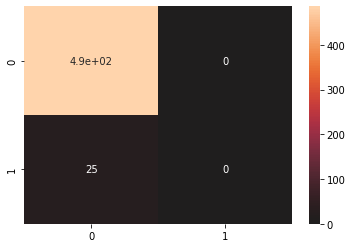

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

CM = confusion_matrix(y_test, y_pred)
print('La matrice de confusion  : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,annot=True)
plt.show()

# **Conclusion**


Sur ce notebook, nous avons travaillé sur une problématique de classification binaire.
Nous avons entraîné deux modèles de classification :

*   Une première avec une regression logistique
*   Une seconde avec l’algorithme des forêts aléatoires. 

L’algorithme des forêts aléatoires a été plus performant que celui de régression logistique : L'accuracy de la regression logistique étant à 93 % et celle des forets aleatoire est de 95%.

Les métriques nous ont permis de constater un déséquilibre des classes. Lors de la classification par régression logistique, ce déséquilibre a été pris en compte par utilisation des paramètres de l'algorithme. Nous avons également explorer l'utilisation de la technique d'`oversampling` pour gérer le déséquilibre des classes.